In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

For our data collection, we recorded the traffic from four different WhatsApp Web groups, each exhibiting distinct characteristics: 

Group A: Only picture messages were sent within this group.<br>
Group B: Only long text messages were exchanged in this group.<br>
Group C: This group contained only video file transfers between members.<br>
Group D: Audio files were the sole media type sent in this group.<br>
This diversity in group traffic composition allowed us to analyze whether unique fingerprints emerged in the timing and size patterns for different content types.<br>

Additionally, we captured a second dataset from Group A. In this new capture, while still only sending pictures, we added background "noise" by streaming music on Spotify concurrently.<br> By comparing this noisy capture to the initial clean Group A traffic, we could examine the impact of mixed media streams on identifying underlying messaging patterns.<br>

We also captured a third dataset from different groups mixed together.In this new capture we sent two pictures, one video and one long message.<br> We tried to understand from this how different times look next to each other.

In [7]:
def plot_graph(data_frame, graph_title):
    """
    Plot a stem graph using data from the provided DataFrame.
    """
    # Extract data from the DataFrame
    time_values = data_frame['Time']
    length_values = data_frame['Length']
    
    # Create a new figure
    plt.figure(figsize=(15, 6)) 
    
    # Plot the stem graph
    plt.stem(time_values, length_values, linefmt='black', markerfmt='.', basefmt='black')
    
    # Set labels and title
    plt.xlabel('Time')
    plt.ylabel('Length')
    plt.title(graph_title, fontsize=15)
    
    # Display the graph
    plt.show()

In [44]:
def plot_pdf(data_frame):
    """
    Plot the Probability Density Function (PDF) of inter-message delays and its fitted exponential distribution.
    """
    
    plt.figure(figsize=(6,3)) 
    # Extract inter-message delays
    inter_message_delays = data_frame['Time'].diff()[1:].values
    
    # Plot histogram
    plt.hist(inter_message_delays, bins=50, density=True, histtype='step', color='blue')
    
    # Fit exponential distribution
    param = expon.fit(inter_message_delays)
    x = np.linspace(0, inter_message_delays.max(), 100)
    fitted_pdf = expon.pdf(x, *param) 
    
    # Plot fitted exponential PDF
    plt.plot(x, fitted_pdf, 'r-', lw=2)  
    
    # Labels and legend
    plt.title('PDF of Inter-Message Delays and Its Fitted Exponential Distribution')
    plt.xlabel('Inter-Message Delays (Seconds)')  
    plt.ylabel('PDF')
    plt.legend(['Histogram of Inter-Message Delays', 'Fitted Exponential Distribution']) 
    
    plt.show()

In [43]:
def plot_hist(data_frame, max_range, graph_title):
    """
    Plot a histogram of the given data within the specified range.
    """
    
    data_diff = data_frame['Time'].diff().shift(-1)
    data_diff
    
    bins = range(0, max_range) 
    plt.figure(figsize=(6,3)) 
    
    # Plot histogram
    plt.hist(data_diff, bins=bins, color='yellow', edgecolor='black')
    
    # Labels and title
    plt.xlabel('Time Difference')
    plt.ylabel('Frequency')
    plt.title(graph_title)
    
    # Show plot
    plt.show()

### Pictures Group

In [5]:
pictures_data = pd.read_csv("../resources/pictures_data.csv")
pictures_data = pictures_data.loc[pictures_data['Length'] > 200] 
pictures_data

,No.,Time,Source,Destination,Protocol,Length,Info
0,6,1.227841,2a03:2880:f258:1c3:face:b00c:0:167,2a00:a041:3c5d:4d00:c4e8:6181:3ac7:bd41,TLSv1.2,255,Application Data
10,30,11.366298,2a03:2880:f258:1c3:face:b00c:0:167,2a00:a041:3c5d:4d00:c4e8:6181:3ac7:bd41,TCP,1468,443 > 58422 [ACK] Seq=239 Ack=256 Win=440 Le...
12,32,11.367145,2a03:2880:f258:1c3:face:b00c:0:167,2a00:a041:3c5d:4d00:c4e8:6181:3ac7:bd41,TLSv1.2,346,"Application Data, Application Data"
15,43,11.644658,2a03:2880:f258:1c3:face:b00c:0:167,2a00:a041:3c5d:4d00:c4e8:6181:3ac7:bd41,TCP,1468,443 > 58422 [ACK] Seq=1877 Ack=256 Win=440 L...
17,45,11.645243,2a03:2880:f258:1c3:face:b00c:0:167,2a00:a041:3c5d:4d00:c4e8:6181:3ac7:bd41,TLSv1.2,282,"Application Data, Application Data"
...,...,...,...,...,...,...,...
11245,11536,236.481158,2a00:a040:0:4:face:b00c:3333:7020,2a00:a041:3c5d:4d00:c4e8:6181:3ac7:bd41,TCP,1468,"443 > 40860 [PSH, ACK] Seq=1502147 Ack=17515..."
11247,11538,236.481872,2a00:a040:0:4:face:b00c:3333:7020,2a00:a041:3c5d:4d00:c4e8:6181:3ac7:bd41,TLSv1.3,1468,Application Data [TCP segment of a reassembled...
11248,11539,236.482790,2a00:a040:0:4:face:b00c:3333:7020,2a00:a041:3c5d:4d00:c4e8:6181:3ac7:bd41,TCP,1468,443 > 40860 [ACK] Seq=1504907 Ack=17515 Win=...
11250,11541,236.483528,2a00:a040:0:4:face:b00c:3333:7020,2a00:a041:3c5d:4d00:c4e8:6181:3ac7:bd41,TCP,1468,"443 > 40860 [PSH, ACK] Seq=1506287 Ack=17515..."


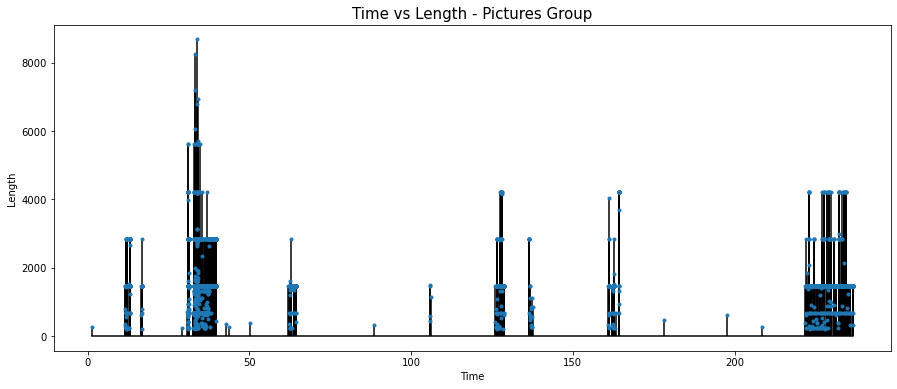

In [8]:
plot_graph(pictures_data,'Time vs Length - Pictures Group')

In order to differentiate noise from actual image data, we conducted an experiment three times where a single image was transmitted through a messaging group.<br>
By analyzing the resulting packet size distributions, it was determined that packets smaller than 200 bytes in size did not contain any meaningful image data and could be classified as noise. 

In [9]:
picture_check1 = pd.read_csv("../resources/picture check/picture_check1_data.csv", encoding='latin-1')

picture_check2 = pd.read_csv("../resources/picture check/picture_check2_data.csv", encoding='latin-1')

picture_check3 = pd.read_csv("../resources/picture check/picture_check3_data.csv", encoding='latin-1')

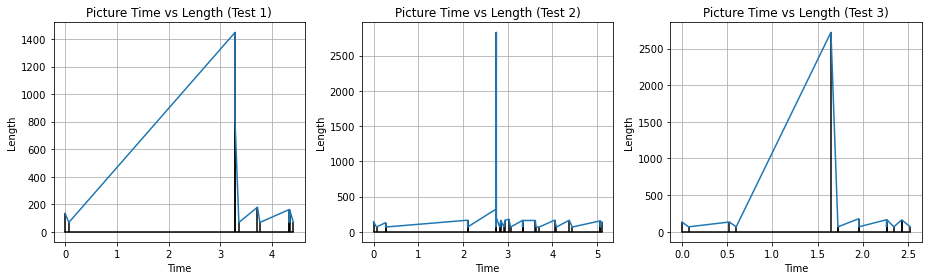

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,4)) 

test1_time = picture_check1['Time']
test1_length = picture_check1['Length']
ax1.stem(test1_time, test1_length, linefmt ='black', markerfmt = '', basefmt='black')
ax1.set_xlabel('Time')
ax1.set_ylabel('Length')
ax1.set_title('Picture Time vs Length (Test 1)')
ax1.grid()

test2_time = picture_check2['Time']
test2_length = picture_check2['Length']
ax2.stem(test2_time, test2_length, linefmt ='black', markerfmt = '', basefmt='black') 
ax2.set_xlabel('Time')
ax2.set_ylabel('Length')
ax2.set_title('Picture Time vs Length (Test 2)')
ax2.grid()

test3_time = picture_check3['Time']
test3_length = picture_check3['Length']
ax3.stem(test3_time, test3_length, linefmt ='black', markerfmt = '', basefmt='black') 
ax3.set_xlabel('Time')
ax3.set_ylabel('Length')
ax3.set_title('Picture Time vs Length (Test 3)')
ax3.grid()

fig.tight_layout()
plt.show()

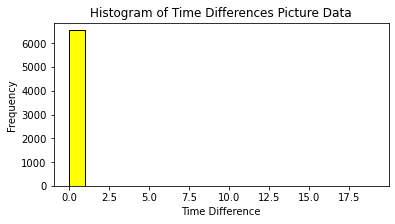

In [50]:
plot_hist(pictures_data, 20, 'Histogram of Time Differences Picture Data')

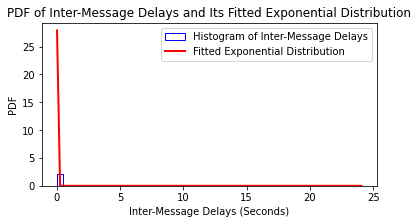

In [51]:
plot_pdf(pictures_data)

### ~ Video Group ~

In [13]:
video_data = pd.read_csv("../resources/filter by port = 443/video_data.csv", encoding='latin-1')
video_data

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.1.12,157.240.214.60,TLSv1.2,1267,Application Data
1,2,0.243511,157.240.214.60,192.168.1.12,TCP,68,443 > 37132 [ACK] Seq=1 Ack=1200 Win=750 Len...
2,3,0.448372,157.240.214.60,192.168.1.12,TLSv1.2,155,Application Data
3,4,0.448406,192.168.1.12,157.240.214.60,TCP,68,37132 > 443 [ACK] Seq=1200 Ack=88 Win=501 Le...
4,5,0.544376,2a00:a041:3c5d:4d00:f27a:171e:3a3f:4952,2606:4700::6812:2a2,TCP,88,49290 > 443 [ACK] Seq=1 Ack=1 Win=501 Len=0 ...
...,...,...,...,...,...,...,...
1153,1154,787.012452,192.168.1.12,51.140.219.248,TCP,56,[TCP Keep-Alive] 59938 > 443 [ACK] Seq=1525 ...
1154,1155,787.035557,20.42.73.27,192.168.1.12,TCP,62,"443 > 34016 [RST, ACK] Seq=8321 Ack=48864 Wi..."
1155,1156,787.134124,51.140.219.248,192.168.1.12,TCP,62,[TCP Keep-Alive ACK] 443 > 59938 [ACK] Seq=1...
1156,1157,793.120382,192.168.1.12,20.93.28.56,TCP,68,[TCP Dup ACK 57#17] 39298 > 443 [ACK] Seq=1 ...


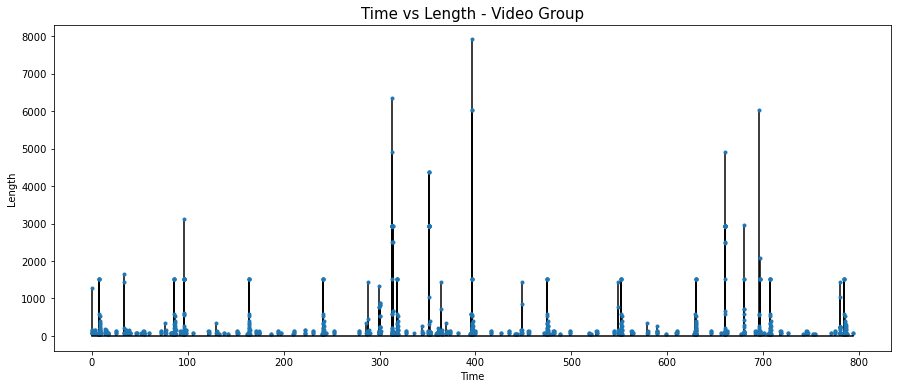

In [14]:
plot_graph(video_data,'Time vs Length - Video Group')

In [15]:
filter_src_dst = video_data.loc[(video_data['Source']=='157.240.214.60') | (video_data['Destination']=='157.240.214.60')]
filter_src_dst = filter_src_dst.loc[filter_src_dst['Length'] > 100]
filter_src_dst

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.1.12,157.240.214.60,TLSv1.2,1267,Application Data
2,3,0.448372,157.240.214.60,192.168.1.12,TLSv1.2,155,Application Data
6,7,0.755726,157.240.214.60,192.168.1.12,TLSv1.2,148,Application Data
8,9,0.760677,192.168.1.12,157.240.214.60,TLSv1.2,146,Application Data
54,55,13.345355,192.168.1.12,157.240.214.60,TLSv1.2,134,Application Data
...,...,...,...,...,...,...,...
1114,1115,780.257062,192.168.1.12,157.240.214.60,TLSv1.2,238,"Application Data, Application Data"
1147,1148,785.966305,157.240.214.60,192.168.1.12,TLSv1.2,304,Application Data
1148,1149,785.969187,192.168.1.12,157.240.214.60,TLSv1.2,187,Application Data
1150,1151,786.050237,157.240.214.60,192.168.1.12,TLSv1.2,233,Application Data


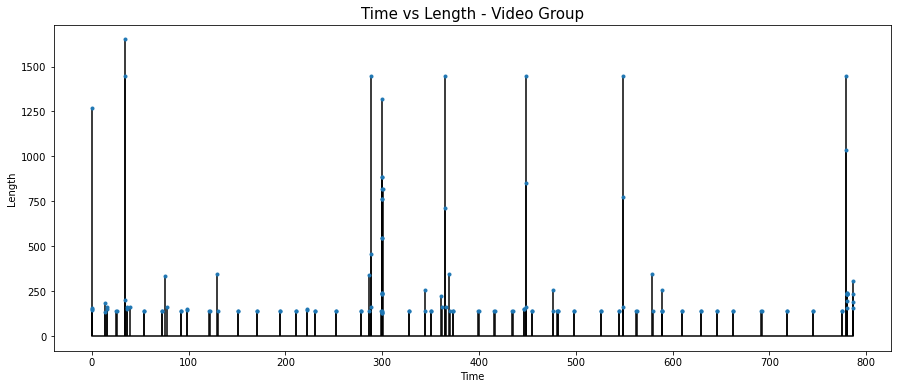

In [16]:
plot_graph(filter_src_dst,'Time vs Length - Video Group')

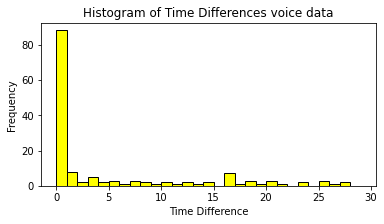

In [18]:
plot_hist(filter_src_dst,30, 'Histogram of Time Differences voice data')

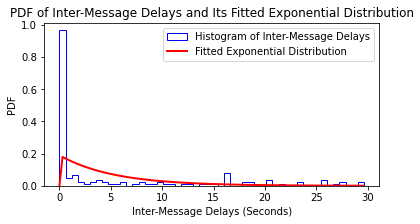

In [49]:
plot_pdf(filter_src_dst)

### Voice Group 

In [19]:
voice_data = pd.read_csv("../resources/voice_data.csv")
voice_data

,No.,Time,Source,Destination,Protocol,Length,Info
0,8,3.376061,192.168.1.12,157.240.221.60,TLSv1.2,135,Application Data
1,9,3.453656,157.240.221.60,192.168.1.12,TCP,66,443 > 40778 [ACK] Seq=1 Ack=70 Win=393 Len=0...
2,10,3.581083,157.240.221.60,192.168.1.12,TLSv1.2,137,Application Data
3,11,3.581118,192.168.1.12,157.240.221.60,TCP,66,40778 > 443 [ACK] Seq=70 Ack=72 Win=501 Len=...
4,12,3.785814,140.82.113.26,192.168.1.12,TLSv1.2,92,Application Data
...,...,...,...,...,...,...,...
929,1135,243.738975,192.168.1.12,157.240.221.60,TLSv1.2,166,Application Data
930,1136,243.743638,192.168.1.12,157.240.221.60,TLSv1.2,162,Application Data
931,1137,243.831478,157.240.221.60,192.168.1.12,TCP,66,443 > 40778 [ACK] Seq=11497 Ack=6532 Win=425...
932,1138,243.831920,157.240.221.60,192.168.1.12,TCP,66,443 > 40778 [ACK] Seq=11497 Ack=6628 Win=425...


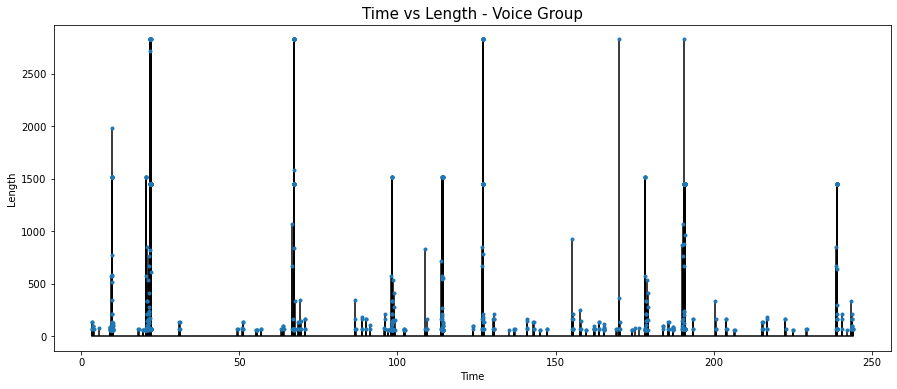

In [20]:
plot_graph(voice_data, 'Time vs Length - Voice Group')

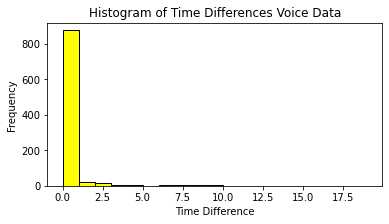

In [53]:
plot_hist(voice_data , 20, 'Histogram of Time Differences Voice Data')

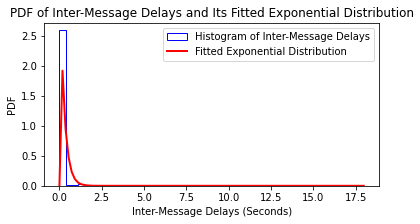

In [54]:
plot_pdf(voice_data)

### Text Group

In [23]:
text_data = pd.read_csv("../resources/text_data.csv", encoding='latin-1')
text_data

,No.,Time,Source,Destination,Protocol,Length,Info
0,4,4.400858,157.240.221.60,192.168.1.12,TLSv1.2,433,Application Data
1,5,4.444965,192.168.1.12,157.240.221.60,TCP,66,45474 > 443 [ACK] Seq=1 Ack=368 Win=1015 Len...
2,6,5.030028,192.168.1.12,157.240.221.60,TLSv1.2,165,Application Data
3,7,5.109090,157.240.221.60,192.168.1.12,TCP,66,443 > 45474 [ACK] Seq=368 Ack=100 Win=376 Le...
4,8,6.039570,157.240.221.60,192.168.1.12,TCP,1446,443 > 45474 [ACK] Seq=368 Ack=100 Win=376 Le...
...,...,...,...,...,...,...,...
612,956,333.892173,13.69.116.104,192.168.1.12,TCP,60,[TCP Keep-Alive ACK] 443 > 41750 [ACK] Seq=6...
613,957,334.512961,192.168.1.12,51.132.193.105,TCP,54,[TCP Keep-Alive] 55964 > 443 [ACK] Seq=32374...
614,958,334.601647,51.132.193.105,192.168.1.12,TCP,60,[TCP Keep-Alive ACK] 443 > 55964 [ACK] Seq=7...
615,959,335.889039,2a00:a041:3c5d:4d00:605e:f34d:a502:2044,2620:1ec:12::239,TCP,74,[TCP Keep-Alive] 32808 > 443 [ACK] Seq=5112 ...


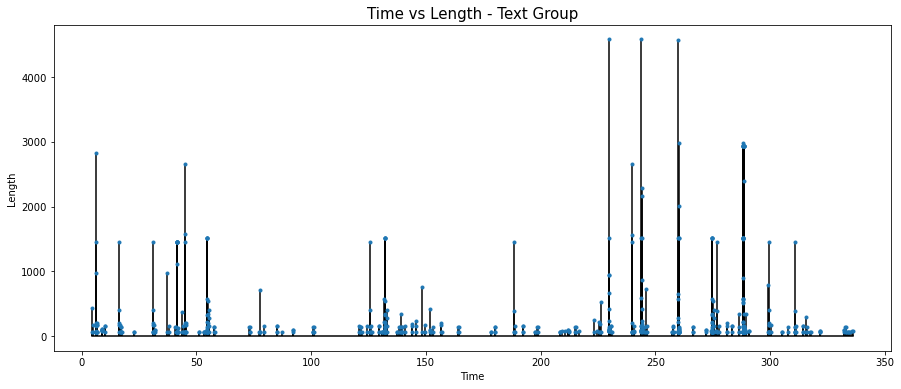

In [24]:
plot_graph(text_data, 'Time vs Length - Text Group')

To determine which data can be considered noise and filtered out,<br>
we conducted an experiment where we recorded the transmission of the smallest message size within the group.<br>
This experiment was performed twice, in two separate trials.

The data graphs from the experiment showed that any packets with a size less than 200 bytes were extraneous to the message transmission.<br> Based on these results, we can conclude that packets under 200 bytes can be assumed to be network noise unrelated to the core messages.<br> Therefore, packets smaller than 200 bytes can be safely filtered out without losing meaningful message data.

In [25]:
smallest_text_check1 = pd.read_csv("../resources/smallest_text_data.csv", encoding='latin-1')
smallest_text_check2 = pd.read_csv("../resources/smallest_text_data2.csv", encoding='latin-1')

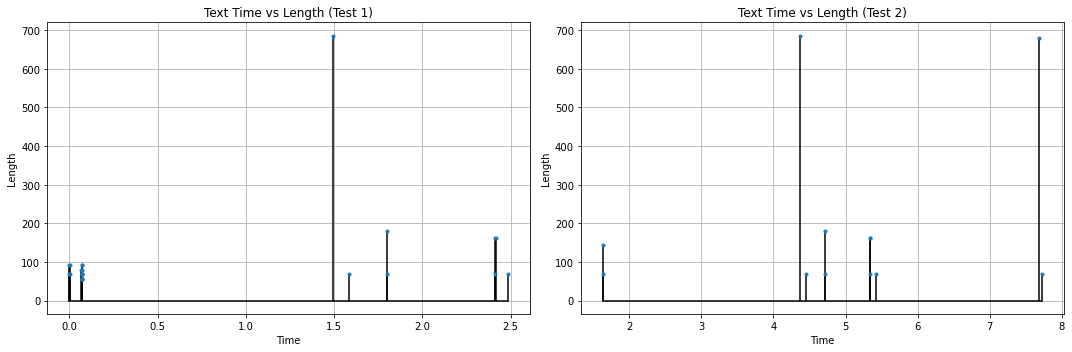

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5)) 

test1_time = smallest_text_check1['Time']
test1_length = smallest_text_check1['Length']
ax1.stem(test1_time, test1_length, linefmt ='black', markerfmt = '', basefmt='black')
ax1.set_xlabel('Time')
ax1.set_ylabel('Length')
ax1.set_title('Text Time vs Length (Test 1)')
ax1.grid()

test2_time = smallest_text_check2['Time']
test2_length = smallest_text_check2['Length']
ax2.stem(test2_time, test2_length, linefmt ='black', markerfmt = '', basefmt='black') 
ax2.set_xlabel('Time')
ax2.set_ylabel('Length')
ax2.set_title('Text Time vs Length (Test 2)')
ax2.grid()
fig.tight_layout()
plt.show()

In [27]:
#filtered length lower than 200 because it is likely to be noise
text_noise_filter = text_data.loc[text_data['Length'] > 200]

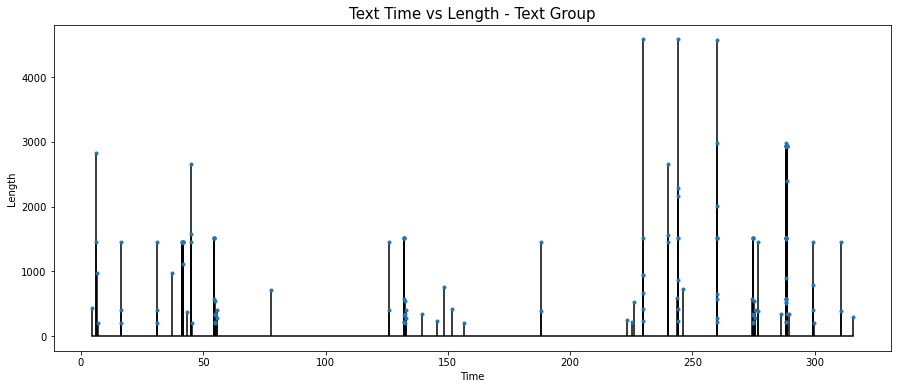

In [28]:
plot_graph(text_noise_filter,'Text Time vs Length - Text Group')

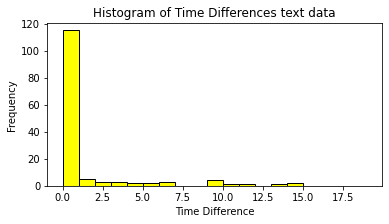

In [47]:
plot_hist(text_noise_filter, 20, 'Histogram of Time Differences text data')

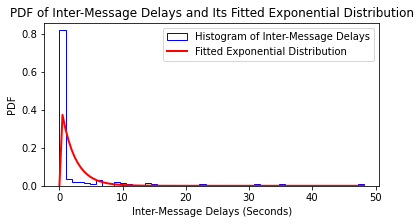

In [52]:
plot_pdf(text_noise_filter)

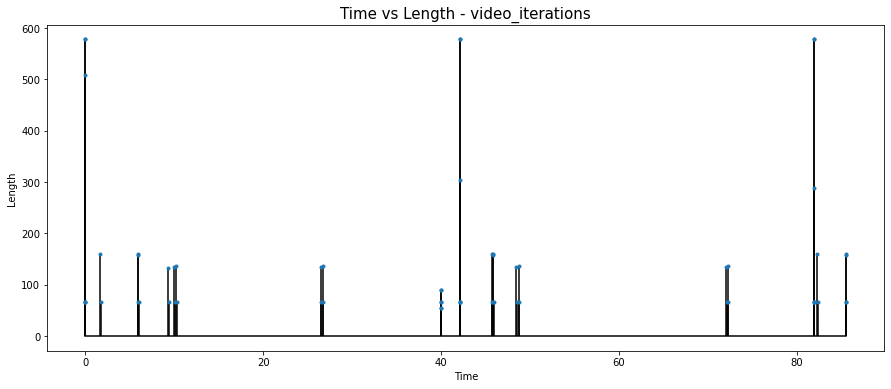

In [31]:
"""
We sent the same video 3 times, with a difference of 40 seconds between each sending, 
in order to observe how the data packets were transmitted. 
We filtered the network traffic (port = 443).
"""
video_iterations = pd.read_csv("../resources/video_iterations.csv", encoding='latin-1')

plot_graph(video_iterations, 'Time vs Length - video_iterations')

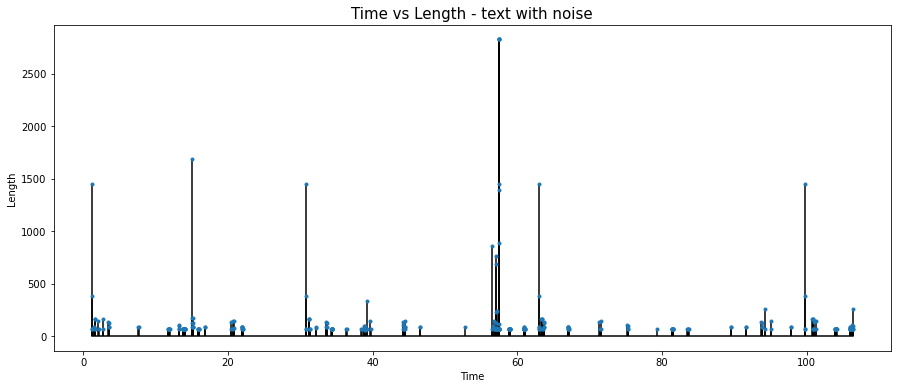

In [32]:
text_with_soptify = pd.read_csv("../resources/text_with_soptify.csv", encoding='latin-1')

plot_graph(text_with_soptify, 'Time vs Length - text with noise')

## Mix data

In [33]:
mix_data = pd.read_csv("../resources/mix_data.csv", encoding='latin-1')
mix_data

,No.,Time,Source,Destination,Protocol,Length,Info
0,2,1.639044,157.240.221.60,192.168.1.12,TLSv1.2,148,Application Data
1,3,1.639088,192.168.1.12,157.240.221.60,TCP,68,42240 > 443 [ACK] Seq=1 Ack=81 Win=501 Len=0...
2,4,1.662054,157.240.221.60,192.168.1.12,TCP,148,[TCP Spurious Retransmission] 443 > 42240 [P...
3,5,1.662097,192.168.1.12,157.240.221.60,TCP,80,[TCP Dup ACK 3#1] 42240 > 443 [ACK] Seq=1 Ac...
4,6,2.560693,157.240.221.60,192.168.1.12,TLSv1.2,148,Application Data
...,...,...,...,...,...,...,...
375,443,112.701334,157.240.221.60,192.168.1.12,TCP,68,443 > 42240 [ACK] Seq=8875 Ack=1539 Win=437 ...
376,444,115.317661,192.168.1.12,157.240.221.60,TLSv1.2,137,Application Data
377,445,115.390531,157.240.221.60,192.168.1.12,TCP,68,443 > 42240 [ACK] Seq=8875 Ack=1608 Win=437 ...
378,446,115.613058,157.240.221.60,192.168.1.12,TLSv1.2,139,Application Data


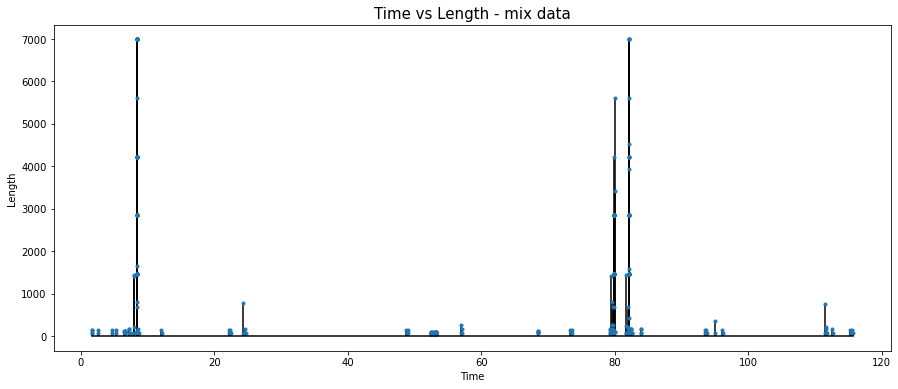

In [34]:
plot_graph(mix_data, 'Time vs Length - mix data')

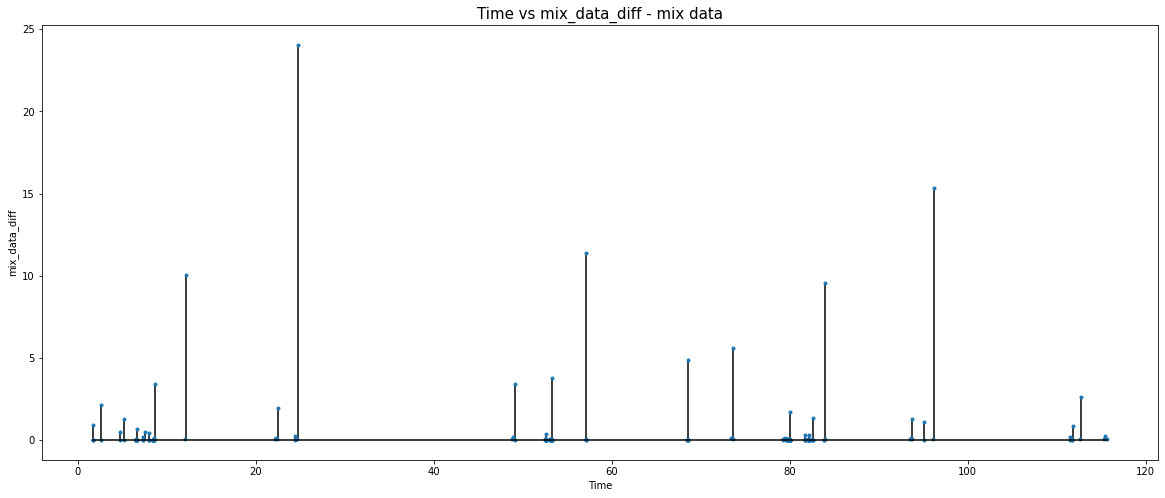

In [37]:
time = mix_data['Time']
mix_data_diff = mix_data['Time'].diff().shift(-1)
plt.figure(figsize=(20,8)) 
plt.stem(time, mix_data_diff,linefmt ='black',markerfmt = '', basefmt='black')
plt.xlabel('Time')
plt.ylabel('mix_data_diff')
plt.title('Time vs mix_data_diff - mix data' , fontsize = 15)
plt.show()

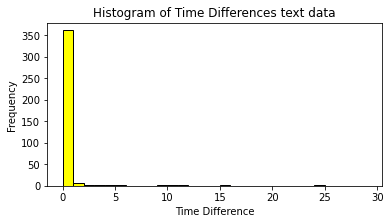

In [45]:
plot_hist(mix_data, 30 , 'Histogram of Time Differences text data')

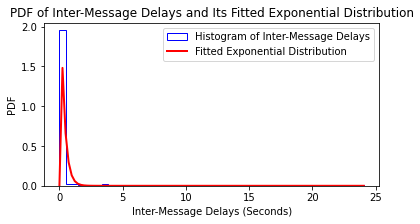

In [46]:
plot_pdf(mix_data)